In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import gensim

In [3]:
verbs = ['увеличить', 'нарастить', 'повысить', 'продлить', 'поднять', 'уменьшить', 'укоротить', 'расширить', 'углубить', 'спустить', 'улучшить', 'ослабить', 'облегчить', 'замедлить', 'снизить', 'понизить', 'удлинить', 'раздуть', 'опустить', 'сократить', 'убавить', 'умалить', 'урезать', 'усилить', 'распространить', 'сузить', 'ухудшить', 'упростить', 'усложнить', 'возвысить', 'сбавить', 'занизить', 'развеять', 'надуть', 'ограничить', 'наполнить', 'опустошить'] # беру все глаголы совершенного вида
words = [elem + '_VERB' for elem in verbs]

In [4]:
G = nx.Graph()

In [5]:
G.add_nodes_from(verbs)

In [6]:
G.nodes

NodeView(('увеличить', 'нарастить', 'повысить', 'продлить', 'поднять', 'уменьшить', 'укоротить', 'расширить', 'углубить', 'спустить', 'улучшить', 'ослабить', 'облегчить', 'замедлить', 'снизить', 'понизить', 'удлинить', 'раздуть', 'опустить', 'сократить', 'убавить', 'умалить', 'урезать', 'усилить', 'распространить', 'сузить', 'ухудшить', 'упростить', 'усложнить', 'возвысить', 'сбавить', 'занизить', 'развеять', 'надуть', 'ограничить', 'наполнить', 'опустошить'))

In [8]:
file = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if file.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(file, binary=False) # наш случай
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(file, binary=True)
else:
    model = gensim.models.KeyedVectors.load(file)

In [9]:
model.init_sims(replace=True) # нормируем

In [10]:
n = len(words)
for i in range(n-1):
    for j in range(i+1, n):
        if model.similarity(words[i], words[j]) > 0.5:
            G.add_edge(verbs[i], verbs[j])

In [11]:
G.edges()

EdgeView([('увеличить', 'уменьшить'), ('повысить', 'снизить'), ('повысить', 'понизить'), ('уменьшить', 'снизить'), ('уменьшить', 'сократить'), ('укоротить', 'удлинить'), ('расширить', 'сузить'), ('улучшить', 'ухудшить'), ('снизить', 'занизить'), ('сократить', 'урезать'), ('убавить', 'сбавить'), ('упростить', 'усложнить')])

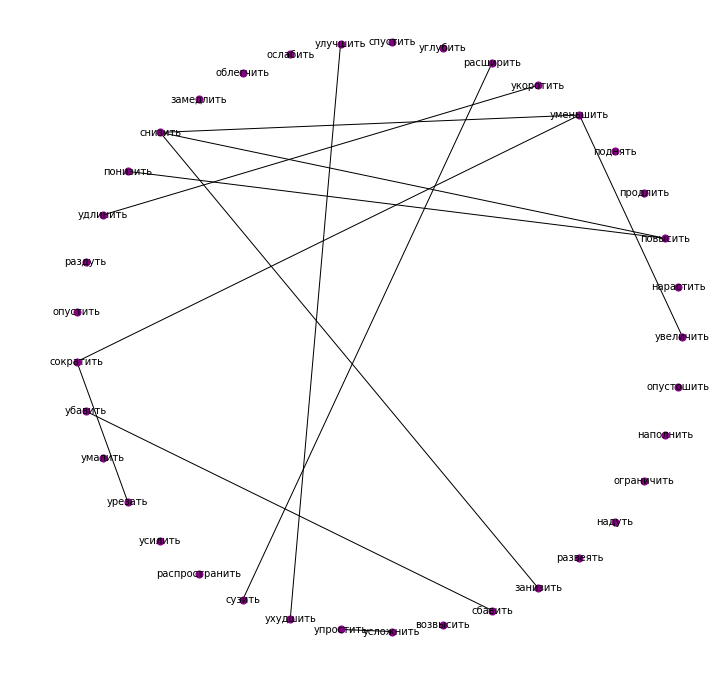

In [16]:
# shell_layout
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis('off')
plt.savefig('shell_layout.png', dpi=200)
plt.show()

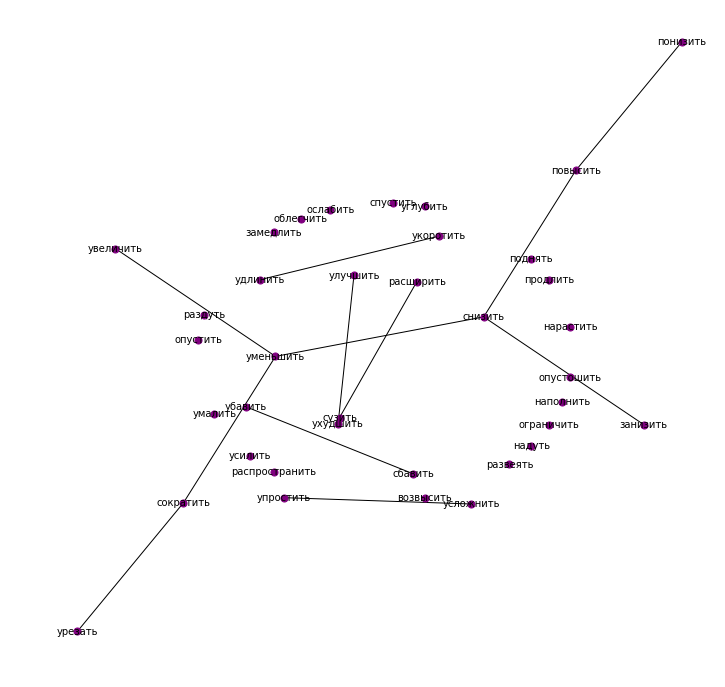

In [17]:
# kamada_kawai_layout
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis('off')
plt.savefig('kamada_kawai_layout.png', dpi=200)
plt.show()

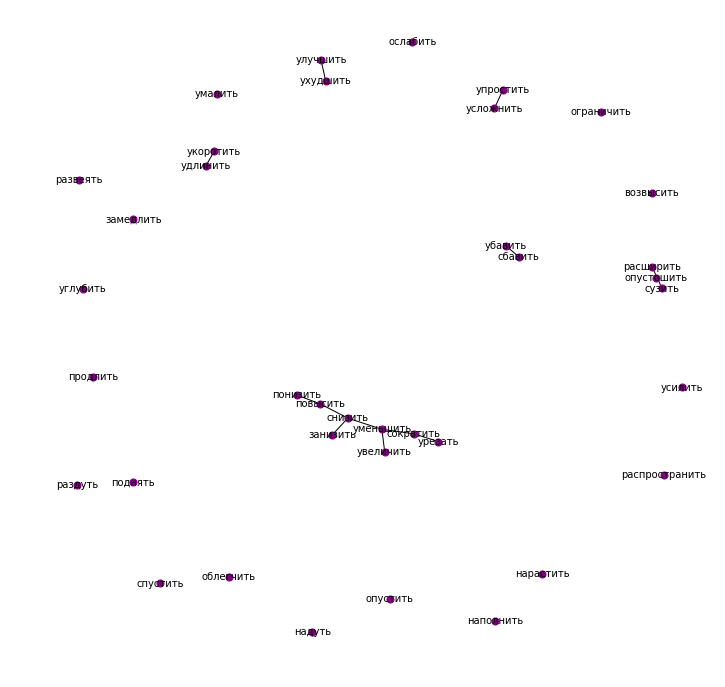

In [18]:
# fruchterman_reingold_layout
plt.figure(figsize=(12, 12))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis('off')
plt.savefig('fruchterman_reingold_layout.png', dpi=200)
plt.show()

In [19]:
# 7 самых центральных слов в графе
centres = nx.degree_centrality(G)
for i, node in enumerate(sorted(centres, key=centres.get, reverse=True)):
    print(node)
    if i == 6:
        break

уменьшить
снизить
повысить
сократить
увеличить
укоротить
расширить


In [21]:
# найдём подграфы, соответствующие компонентам связаности
subgraphs = [] # будем класть туда множества вершин, принадлежащих одной компоненте связности
for j, edge in enumerate(G.edges):
    first, second = edge
    if subgraphs:
        fl = 0
        delete = [] # то, что нужно удалить
        for i, subgraph in enumerate(subgraphs):
            if first in subgraph or second in subgraph:
                if fl == 1: # если вершины можно отнести одновременно к двум множествам, то их нужно объединить
                    subgraphs[ind] |= subgraph # объединем
                    delete.append(i) # лишний оставляем на удаление
                else:
                    subgraphs[i] |= {first, second}
                    fl = 1
                    ind = i
        for ind in delete:
            subgraphs.pop(ind)

        if fl == 0:
            subgraphs.append({first, second})
    else:
        subgraphs.append({first, second})

In [22]:
subgraphs = [list(elem) for elem in subgraphs]
subgraphs

[['увеличить',
  'снизить',
  'повысить',
  'урезать',
  'сократить',
  'занизить',
  'понизить',
  'уменьшить'],
 ['удлинить', 'укоротить'],
 ['сузить', 'расширить'],
 ['улучшить', 'ухудшить'],
 ['сбавить', 'убавить'],
 ['усложнить', 'упростить']]

In [23]:
subs_G = [G.subgraph(subgraphs[i]) for i in range(len(subgraphs))]

In [24]:
sum = 0
num = 0
for i, sub in enumerate(subs_G):
    rad = nx.radius(sub)
    print('Радиус {}-й компоненты связности равен {}'.format(i, rad))
    sum += rad
    num += 1
print('Средний радиус по всем компонентам связности равен:', round(sum / num, 2))

Радиус 0-й компоненты связности равен 3
Радиус 1-й компоненты связности равен 1
Радиус 2-й компоненты связности равен 1
Радиус 3-й компоненты связности равен 1
Радиус 4-й компоненты связности равен 1
Радиус 5-й компоненты связности равен 1
Средний радиус по всем компонентам связности равен: 1.33


In [25]:
nx.average_clustering(G) # коэффициент кластеризации
# нулевой, поскольку много "мусора", т.е. не очень связанных с остальными глаголов

0.0

In [26]:
nx.transitivity(G) # это отличный от коэффициента кластеризации параметр, вычисляющий долю всех имеющихся треугольников в G.
# как видно по графам, треугольников на них действительно нет

0